# Sprint5 - 機械学習スクラッチSVM

## 【問題1】SVM分類器のクラスを作成する

In [168]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
class ScratchSVMClassifier():
    def __init__(self, num_iter=60000, lr=0.000001, bias=True, verbose=False):
        #引数で指定するもの
        #学習率
        self.lr = lr
        self.num_iter = num_iter

        #自分で定義したもの
        self.r = None
        
    def _fit(self,X,y,Xval=None,y_val=None):
        #ランダムにデータ個数分ラムダを生成
        self.r = np.random.rand(X.shape[0])*0.001

        '''
        ■今回の目的関数
        ''' 
        right = np.dot(y,y.T)*np.dot(X,X.T)
        self.r=self.r+self.lr*(1-np.dot(self.r,right))
        
        #ラムダが０未満のものに０を代入
        self.r[self.r < 0 ] = 0
        #しきい値はpdfから設定
        hantei_index=np.where(self.r > 0.0001)
        
        #サポートベクターのデータを抽出
        self.r = self.r[hantei_index]
        self.X = X[hantei_index]
        self.y = y[hantei_index]
        
        #ベクトルを行列に変換
        self.r = np.reshape(self.r, (-1, 1))
        
    def _predict(self,X):        
        '''
        ■今回の仮定関数
        '''
        array = np.sum(self.r.T * self.y.T*np.dot(X,self.X.T), axis=1)
        
        #値が0未満のものには-1を、０以上のものには１を返す
        array[array < 0 ] = -1
        array[array >= 0 ] = 1
        
        self.array = array
        
        return array
        

In [169]:
'''
■Sprint2の1のデータ・セット
'''
np.random.seed(seed=0)
n_samples = 500
f0 = [-1, 2]
f1 = [2, -1]
cov = [[1.0,0.8], [0.8, 1.0]]

f0 = np.random.multivariate_normal(f0, cov, int(n_samples/2))
f1 = np.random.multivariate_normal(f1, cov, int(n_samples/2))

X2 = np.concatenate((f0, f1))
y2= np.concatenate((np.ones((int(n_samples/2))), np.ones((int(n_samples/2))) *(-1))).astype(np.int)

random_index = np.random.permutation(np.arange(n_samples))
X2 = X2[random_index]
y2 = y2[random_index]

In [170]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2,train_size=0.75)

In [171]:
slr = ScratchSVMClassifier()
slr._fit(X_train2,y_train2)

In [172]:
y_pred = slr._predict(X_test2)

In [173]:
hantei_index1=np.where(y2 == 1)
hantei_index2=np.where(y2 == -1)
X_red = X2[hantei_index1]
X_blue = X2[hantei_index2]

## 【問題3】指標値の算出

In [174]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
corect_percent = accuracy_score(y_pred, y_test2)*100
fit_percent = precision_score(y_pred, y_test2, average='macro')*100
recall_percent = recall_score(y_pred, y_test2, average='macro')*100
f1_percent = f1_score(y_pred, y_test2, average='macro')*100

print('①正解率は{:.2f}%です'.format(corect_percent))
print('②適合率は{:.2f}%です'.format(fit_percent))
print('③再現率は{:.2f}%です'.format(recall_percent))
print('④F値は{:.2f}%です'.format(f1_percent))

①正解率は100.00%です
②適合率は100.00%です
③再現率は100.00%です
④F値は100.00%です


# 【問題4】決定領域の可視化

In [175]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2

    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model._predict(mesh).reshape(mesh_f0.shape)

    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    
    '''
    ■enumerate意味
    インデックス番号がi
    中身がtargetにそれぞれ入る
    
    ■setの意味
    ユニークな値のみ残す
    
    yの値が1か-1の時のXを抽出
    '''
    for i, target in enumerate(set(y)):
        
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

In [176]:
from matplotlib.colors import ListedColormap

# 可視化関数
def plot_decision_regions(X, model):
    plt.scatter(X2[:,0], X2[:,1], s=80, c=y2, marker='o')
    #print(model.sv_lt)
    #どこからとってくるか変える
    for sv in model.X:
        
        plt.scatter(sv[0], sv[1], s=80, c='c', marker='o')
    
    #サポートベクターも同様にプロット
    step = 0.1
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    pred = model._predict(mesh).reshape(mesh_f0.shape)
    plt.contour(mesh_f0, mesh_f1, pred, 1)
    plt.show()

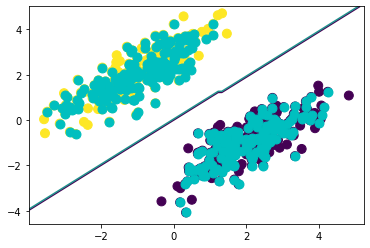

In [177]:
plot_decision_regions(X_train2,slr)

In [178]:
import time
t0 = time.time()
slr = ScratchSVMClassifier()
slr._fit(X_train2,y_train2)
t1 = time.time()
print('time : {}s'.format(t1-t0))

time : 0.006700038909912109s


## ■fitさせる箇所の処理は
time : 0.007117271423339844s

## 【問題6】ロジスティック回帰とSVMの違い
SVMは決定境界の両側に「ギャップ」を維持しようとしているので、新しいテスト用のデータに遭遇したときに役立つと思いました。